<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-22 18:42:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.6MB/s    in 2.2s    

2025-06-22 18:43:02 (70.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



/tmp/ipykernel_1056/842600036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DatabaseWantToWorkWith'] = df_clean['DatabaseWantToWorkWith'].str.split(';')


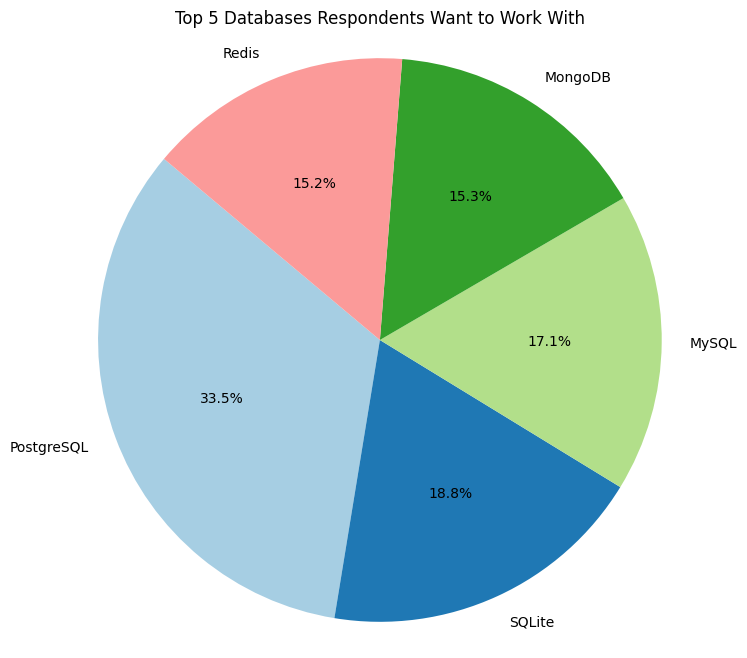

In [4]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Drop rows where DatabaseWantToWorkWith is missing
df_clean = df.dropna(subset=['DatabaseWantToWorkWith'])

# Split semicolon-separated databases into lists
df_clean['DatabaseWantToWorkWith'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Explode the list into separate rows
df_exploded = df_clean.explode('DatabaseWantToWorkWith')

# Count frequency of each database
db_counts = df_exploded['DatabaseWantToWorkWith'].value_counts()

# Select top 5 databases
top5_dbs = db_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_dbs,
    labels=top5_dbs.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



/tmp/ipykernel_1056/3824626505.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DevType'] = df_clean['DevType'].str.split(';')


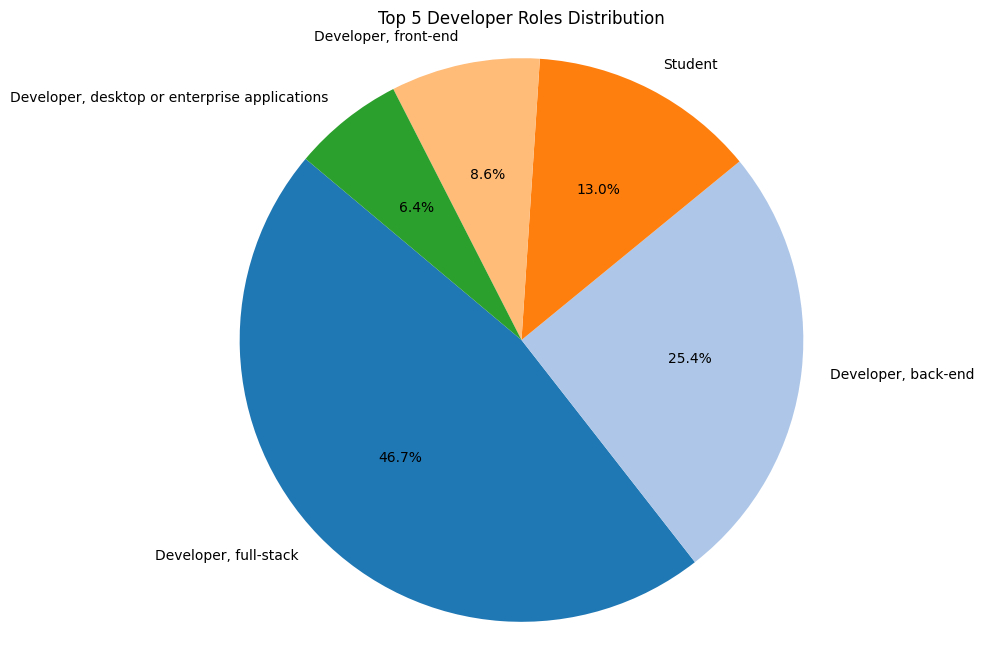

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing DevType
df_clean = df.dropna(subset=['DevType'])

# Split semicolon-separated roles into lists
df_clean['DevType'] = df_clean['DevType'].str.split(';')

# Explode to separate rows
df_exploded = df_clean.explode('DevType')

# Count frequency of each developer role
role_counts = df_exploded['DevType'].value_counts()

# Select top 5 roles
top5_roles = role_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_roles,
    labels=top5_roles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Top 5 Developer Roles Distribution')
plt.axis('equal')  # Make pie chart circular
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



/tmp/ipykernel_1056/2674552598.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['OpSysProfessional use'] = df_clean['OpSysProfessional use'].str.split(';')


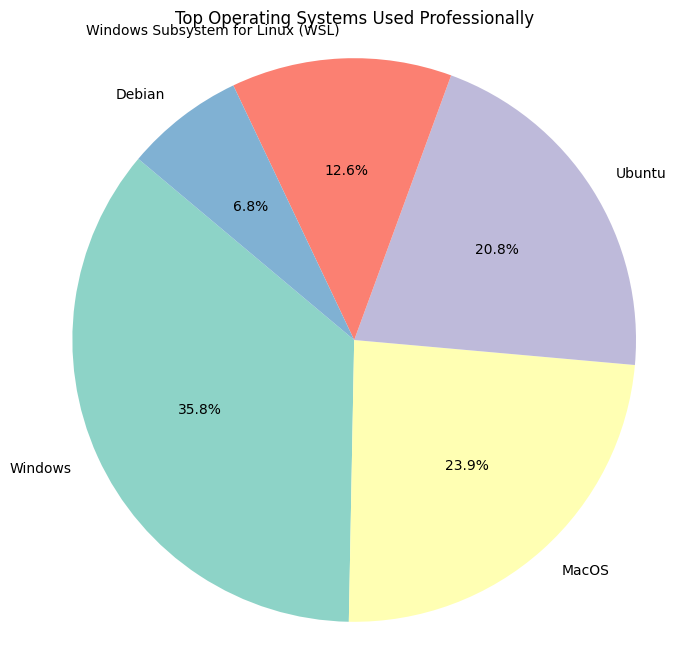

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing 'OpSysProfessional use'
df_clean = df.dropna(subset=['OpSysProfessional use'])

# Split semicolon-separated OS list
df_clean['OpSysProfessional use'] = df_clean['OpSysProfessional use'].str.split(';')

# Explode to separate rows
df_exploded = df_clean.explode('OpSysProfessional use')

# Count frequency of each OS
os_counts = df_exploded['OpSysProfessional use'].value_counts()

# Select top 5 operating systems
top_os = os_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_os,
    labels=top_os.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Top Operating Systems Used Professionally')
plt.axis('equal')  # Make pie chart circular
plt.show()


In [7]:
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [8]:
print([col for col in df.columns if 'OpSys' in col])


['OpSysPersonal use', 'OpSysProfessional use']


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



/tmp/ipykernel_1056/1133541127.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')


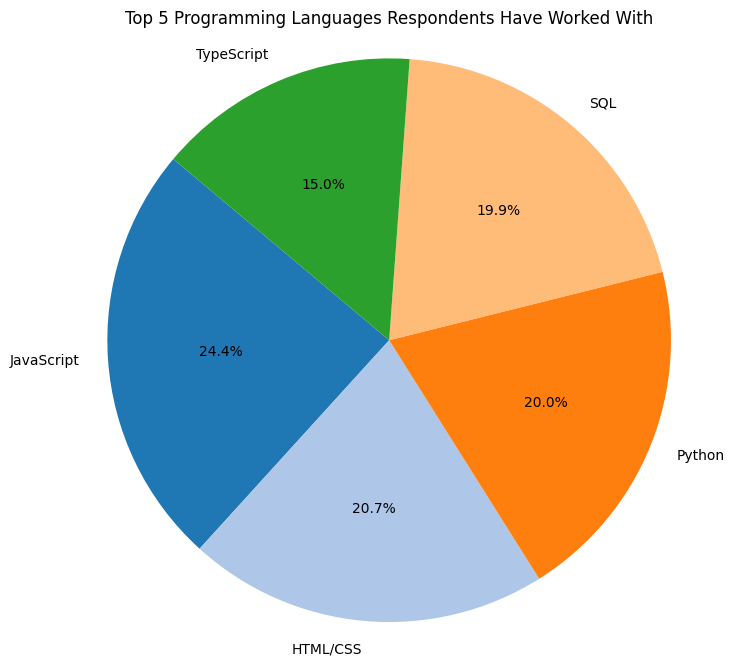

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Drop rows where LanguageHaveWorkedWith is missing
df_clean = df.dropna(subset=['LanguageHaveWorkedWith'])

# Split the semicolon-separated list of languages
df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Explode to separate rows
df_exploded = df_clean.explode('LanguageHaveWorkedWith')

# Count frequency of each language
language_counts = df_exploded['LanguageHaveWorkedWith'].value_counts()

# Get top 5 languages
top5_languages = language_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_languages,
    labels=top5_languages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Top 5 Programming Languages Respondents Have Worked With')
plt.axis('equal')  # Make the pie chart circular
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



/tmp/ipykernel_1056/1170189906.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')


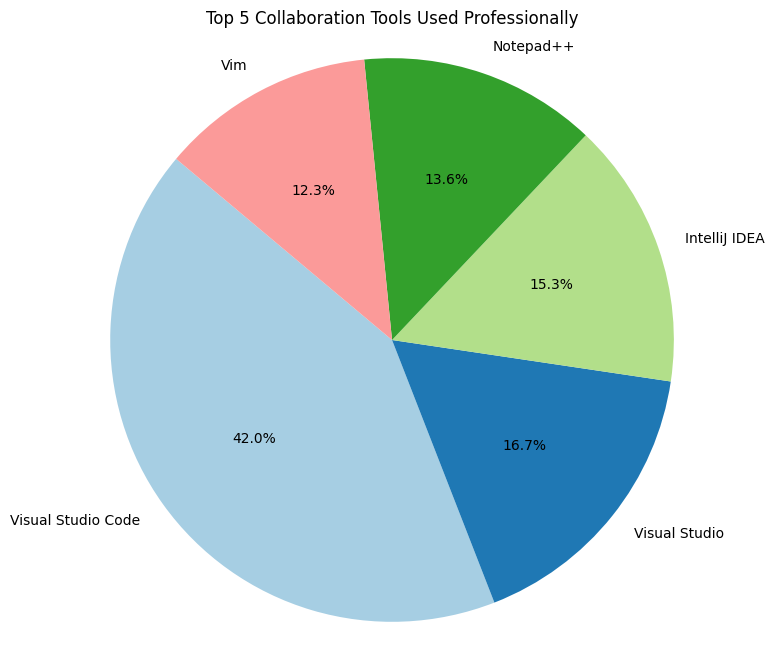

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 1: Drop rows where the collaboration tools data is missing
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])

# Step 2: Split the semicolon-separated tools into lists
df_clean['NEWCollabToolsHaveWorkedWith'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Step 3: Explode the lists into separate rows for counting
df_exploded = df_clean.explode('NEWCollabToolsHaveWorkedWith')

# Step 4: Count the frequency of each collaboration tool
tool_counts = df_exploded['NEWCollabToolsHaveWorkedWith'].value_counts()

# Step 5: Select the top 5 collaboration tools
top5_tools = tool_counts.head(5)

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_tools,
    labels=top5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Collaboration Tools Used Professionally')
plt.axis('equal')  # Equal aspect ratio for a circular pie
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



/tmp/ipykernel_1056/298210128.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')


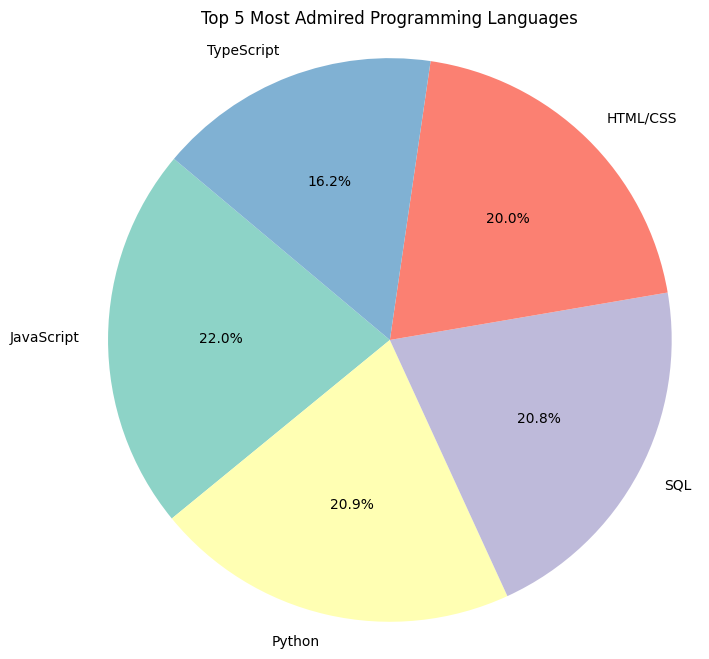

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop missing values in LanguageAdmired
df_clean = df.dropna(subset=['LanguageAdmired'])

# Split semicolon-separated list into lists
df_clean['LanguageAdmired'] = df_clean['LanguageAdmired'].str.split(';')

# Explode into separate rows
df_exploded = df_clean.explode('LanguageAdmired')

# Count frequencies
admired_counts = df_exploded['LanguageAdmired'].value_counts()

# Select top 5
top5_admired = admired_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_admired,
    labels=top5_admired.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Top 5 Most Admired Programming Languages')
plt.axis('equal')  # Keep pie chart circular
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [14]:
print([col for col in df.columns if 'AI' in col or 'Tool' in col])


['BuyNewTool', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'AIThreat', 'AIEthics', 'AIChallenges']


/tmp/ipykernel_1056/1115620008.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AIToolCurrently Using'] = df_clean['AIToolCurrently Using'].str.split(';')


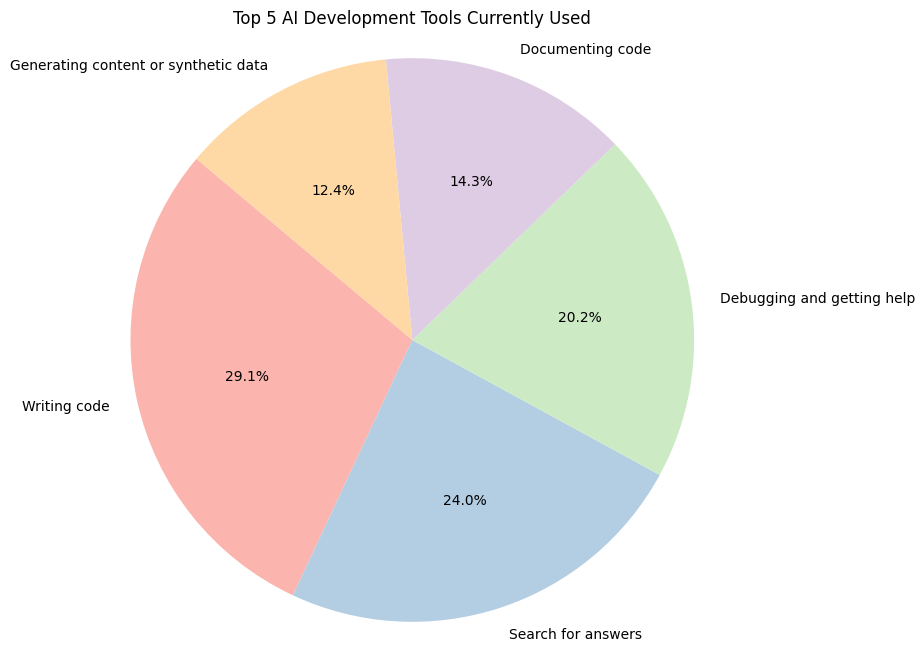

In [15]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing 'AIToolCurrently Using'
df_clean = df.dropna(subset=['AIToolCurrently Using'])

# Split semicolon-separated tools into lists
df_clean['AIToolCurrently Using'] = df_clean['AIToolCurrently Using'].str.split(';')

# Explode the list into separate rows
df_exploded = df_clean.explode('AIToolCurrently Using')

# Count the frequency of each AI tool
tool_counts = df_exploded['AIToolCurrently Using'].value_counts()

# Get the top 5 tools
top5_tools = tool_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_tools,
    labels=top5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top 5 AI Development Tools Currently Used')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



/tmp/ipykernel_1056/499873486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')


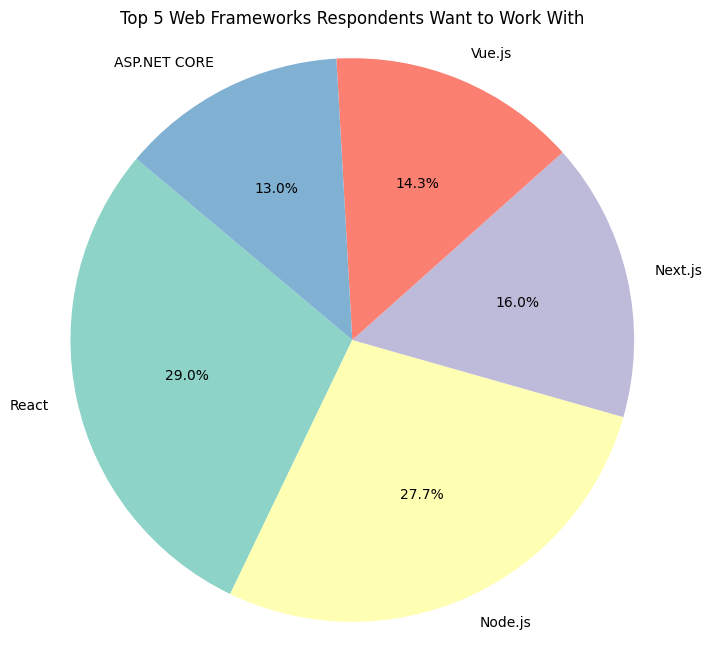

In [16]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Drop rows with missing WebframeWantToWorkWith
df_clean = df.dropna(subset=['WebframeWantToWorkWith'])

# Split the semicolon-separated frameworks into lists
df_clean['WebframeWantToWorkWith'] = df_clean['WebframeWantToWorkWith'].str.split(';')

# Explode the lists into separate rows
df_exploded = df_clean.explode('WebframeWantToWorkWith')

# Count frequency of each framework
framework_counts = df_exploded['WebframeWantToWorkWith'].value_counts()

# Select top 5 frameworks
top5_frameworks = framework_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_frameworks,
    labels=top5_frameworks.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Top 5 Web Frameworks Respondents Want to Work With')
plt.axis('equal')  # Keep pie chart circular
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



/tmp/ipykernel_1056/4254985256.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EmbeddedWantToWorkWith'] = df_clean['EmbeddedWantToWorkWith'].str.split(';')


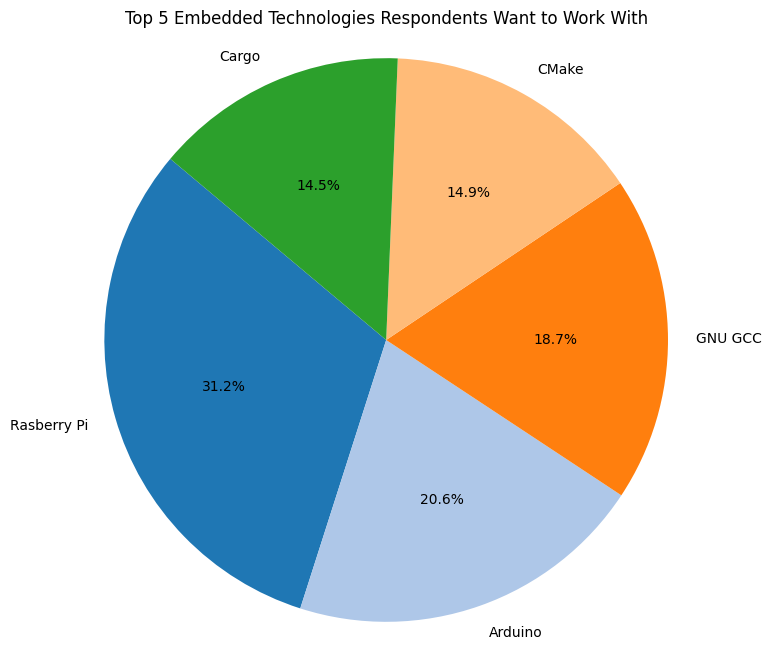

In [17]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing EmbeddedWantToWorkWith data
df_clean = df.dropna(subset=['EmbeddedWantToWorkWith'])

# Split the semicolon-separated list into individual embedded technologies
df_clean['EmbeddedWantToWorkWith'] = df_clean['EmbeddedWantToWorkWith'].str.split(';')

# Explode the list into separate rows
df_exploded = df_clean.explode('EmbeddedWantToWorkWith')

# Count the frequency of each embedded technology
embedded_counts = df_exploded['EmbeddedWantToWorkWith'].value_counts()

# Select the top 5 most desired embedded technologies
top5_embedded = embedded_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top5_embedded,
    labels=top5_embedded.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Top 5 Embedded Technologies Respondents Want to Work With')
plt.axis('equal')  # Make the pie chart circular
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
